In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import time

In [8]:
from IPython import display

In [9]:
%matplotlib inline

Import the dataset and use it to make a plot

In [10]:
#read_csv function of pandas
dataset = pd.read_csv('ADRvsRating.csv')

In [11]:
print(dataset)

       ADR  Rating
0     85.0   117.0
1     83.5   110.0
2     78.2   102.0
3     68.1    97.0
4     66.3    86.0
5     99.8   135.0
6     78.2   120.0
7     85.6   103.0
8     66.6   100.0
9     57.5    87.0
10   118.6   182.0
11   114.8   167.0
12    90.0   155.0
13    59.2   122.0
14    68.9   107.0
15    85.0   101.0
16    65.8    81.0
17    44.7    55.0
18    56.2    52.0
19    54.2    50.0
20   113.7   142.0
21    86.1   128.0
22    77.9   115.0
23    62.5    81.0
24    43.7    69.0
25   100.4   123.0
26    73.1   110.0
27    73.9   108.0
28    59.6    99.0
29    55.0    72.0
..     ...     ...
970   80.5   112.0
971   77.0   109.0
972   64.8   107.0
973   66.4    93.0
974   57.2    77.0
975  106.7   140.0
976   78.4   115.0
977   80.9   110.0
978   62.1   105.0
979   72.5   103.0
980   97.4   140.0
981   88.7   131.0
982   89.8   112.0
983   56.4    95.0
984   57.0    89.0
985   81.1   129.0
986   89.3   120.0
987   64.0    87.0
988   59.7    73.0
989   52.9    63.0
990  101.4  

Convert dataset to matrix

In [14]:
#as_matrix to convert to numpy
data = dataset.as_matrix()

In [13]:
print(data)

[[  85.   117. ]
 [  83.5  110. ]
 [  78.2  102. ]
 ..., 
 [  58.6   63. ]
 [  61.8   62. ]
 [  44.7   51. ]]


In [15]:
print(data[2,4])

IndexError: index 4 is out of bounds for axis 1 with size 2

In [16]:
print(data[1, 0])

83.5


In [17]:
print(data[1:3,0])

[ 83.5  78.2]


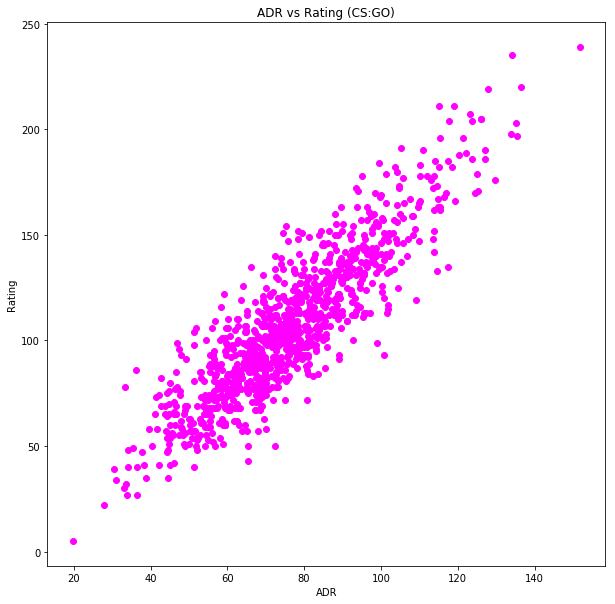

In [26]:
plt.figure(figsize=(10,10))
plt.title('ADR vs Rating (CS:GO)')
plt.xlabel('ADR')
plt.ylabel('Rating')
#scatter takes range of x values and range of y values
plt.scatter(x=data[:,0],y=data[:,1],c='magenta')
plt.show()

In [30]:
 def calculate_error(b_instantaneous, m_instantaneous, data):
    total_error = 0;
    for i in range(0,len(data)):
            x = data[i, 0];
            y = data[i, 1];
            total_error += ((y - (m_instantaneous*x + b_instantaneous))**2)/len(data)
    
    return total_error

In [38]:
b = 1.2
m = 1.8
print(calculate_error(b, m, data))

1249.6958804


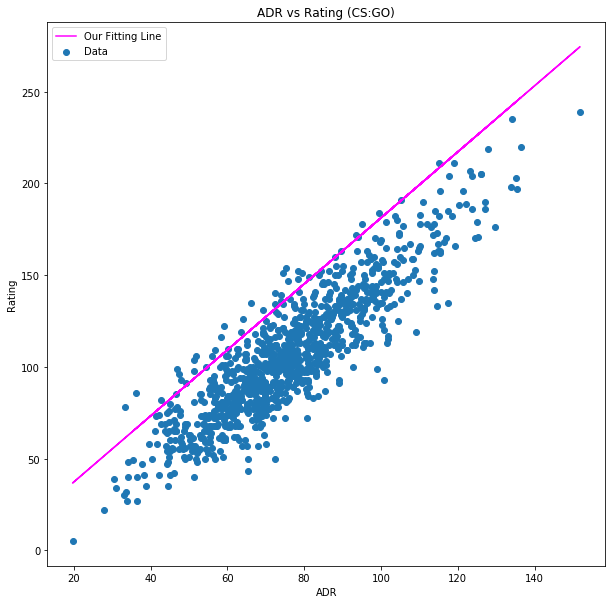

In [45]:
fig = plt.figure(figsize=(10,10))
#for adding subplot integer for size
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
#ax for plottind data points
ax.scatter(x=data[:,0],y=data[:,1],label='Data')
#plt for ploting the line
plt.plot(data[:,0], m*data[:,0] + b,color='magenta',label='Our Fitting Line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')
plt.show()

In [49]:
def get_gradient_descent(b_instantaneous, m_instantaneous, data):
    b_gradient = 0;
    m_gradient = 0;
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(2/len(data)) * (y - ((m_instantaneous * x) + b))
        m_gradient += -(2/len(data)) * (y - ((m_instantaneous * x) + b)) * x
    b_closer_to_optimized = b_instantaneous - (0.0001 * b_gradient)
    m_closer_to_optimized = m_instantaneous - (0.0001 * m_gradient)
    return b_closer_to_optimized, m_closer_to_optimized

In [57]:
#Testing for only 3 iterations
b = 1.2
m = 1.8
for i in range(3):
    print('For {0} iteration, b is {1}, m is {2}, error is {3}'.format(i + 1, b, m, calculate_error(b, m, data)))
    b, m = get_gradient_descent(b, m, data)
    
    

For 1 iteration, b is 1.2, m is 1.8, error is 1249.6958803999978
For 2 iteration, b is 1.193731116, m is 1.3104404804000003, error is 319.50625465451776
For 3 iteration, b is 1.1948917584003083, m is 1.4200545700203273, error is 272.8754542992769


In [51]:
def perform_gradient_descent(b_current, m_current, num_iterations, data):
    for i in range(num_iterations):
        b_current, m_current = get_gradient_descent(b_current, m_current, data)
        print('Error is {0}'.format(calculate_error(b_current, m_current, data)))
    return b_current, m_current

In [53]:
b, m = perform_gradient_descent(0, 0, 1000, data)
print('Best Line is y = {0}x  {1}'.format(m, b))

Error is 892.831261336125
Error is 296.8415429160014
Error is 270.2138082311555
Error is 268.165731495823
Error is 268.2226743409691
Error is 268.18941892248057
Error is 268.19535466883116
Error is 268.19348358867285
Error is 268.1934051050458
Error is 268.19292843769927
Error is 268.192540966102
Error is 268.19213364625466
Error is 268.19173084408067
Error is 268.1913271134573
Error is 268.1909236715909
Error is 268.1905202464323
Error is 268.19011689878425
Error is 268.1897136150586
Error is 268.1893103982912
Error is 268.18890724780397
Error is 268.18850416374863
Error is 268.1881011460912
Error is 268.1876981948389
Error is 268.1872953099905
Error is 268.18689249154585
Error is 268.1864897395054
Error is 268.18608705386913
Error is 268.185684434637
Error is 268.18528188180846
Error is 268.1848793953844
Error is 268.1844769753639
Error is 268.18407462174764
Error is 268.183672334535
Error is 268.1832701137267
Error is 268.18286795932227
Error is 268.1824658713223
Error is 268.182063

Error is 267.85093641232305
Error is 267.85059349030297
Error is 267.8502506346871
Error is 267.84990784547506
Error is 267.8495651226674
Error is 267.84922246626354
Error is 267.84887987626337
Error is 267.8485373526675
Error is 267.8481948954754
Error is 267.8478525046878
Error is 267.84751018030374
Error is 267.84716792232393
Error is 267.8468257307487
Error is 267.84648360557634
Error is 267.8461415468092
Error is 267.8457995544455
Error is 267.84545762848506
Error is 267.8451157689292
Error is 267.8447739757782
Error is 267.8444322490303
Error is 267.8440905886866
Error is 267.843748994747
Error is 267.84340746721114
Error is 267.8430660060797
Error is 267.84272461135225
Error is 267.84238328302894
Error is 267.842042021109
Error is 267.8417008255937
Error is 267.8413596964823
Error is 267.8410186337747
Error is 267.8406776374713
Error is 267.84033670757174
Error is 267.83999584407604
Error is 267.83965504698494
Error is 267.83931431629725
Error is 267.83897365201403
Error is 267.

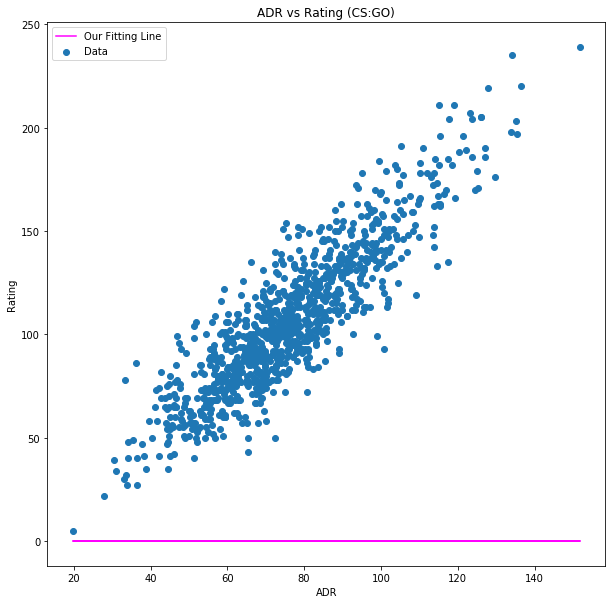

In [54]:
#starting line
m_start = 0
b_start = 0
fig = plt.figure(figsize=(10,10))
#for adding subplot integer for size
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
#ax for plottind data points
ax.scatter(x=data[:,0],y=data[:,1],label='Data')
#plt for ploting the line
plt.plot(data[:,0], m_start*data[:,0] + b_start,color='magenta',label='Our Fitting Line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')
plt.show()


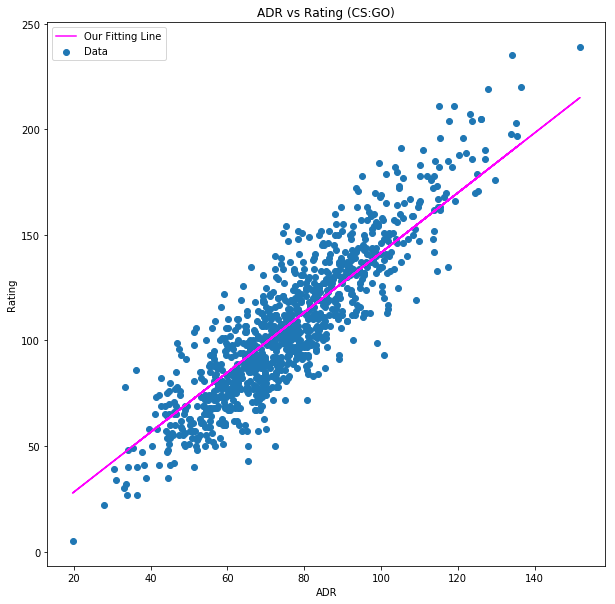

In [55]:
fig = plt.figure(figsize=(10,10))
#for adding subplot integer for size
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
#ax for plottind data points
ax.scatter(x=data[:,0],y=data[:,1],label='Data')
#plt for ploting the line
plt.plot(data[:,0], m*data[:,0] + b,color='magenta',label='Our Fitting Line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')
plt.show()